Topic:        Challenge Set 1 

Subject:      Explore MTA turnstile data

Date:         01/15/2016

Name:         Will Stokvis


### Challenge 1





Open up a new IPython notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [412]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from collections import defaultdict
from dateutil.parser import parse
from datetime import datetime
import time
%matplotlib inline

In [375]:
path =  '/Users/williamstokvis/Education/metis/Challenges/Week1-MTA/MTA_DATA_'
file = '171230.csv'
mta_file = defaultdict(list)
with open(path + file, 'r') as csvfile:
    mta_data = csv.reader(csvfile)
    for row in mta_data:
        ca = row[0]
        unit = row[1]
        scp = row[2]
        station = row[3]
        line = row[4]
        division = row[5]
        date = row[6]
        time = row[7]
        desc = row[8]
        entries = row[9]
        exits = row[10].strip()
        keyGroup = (ca, unit, scp, station)
        valueGroup = [line, division, date, time, desc, entries, exits]
        mta_file[keyGroup].append(valueGroup)

In [379]:
mta_file[('A002',
              'R051',
              '02-00-00',
              '59 ST')]

[['NQR456W',
  'BMT',
  '12/23/2017',
  '03:00:00',
  'REGULAR',
  '0006455840',
  '0002184987'],
 ['NQR456W',
  'BMT',
  '12/23/2017',
  '07:00:00',
  'REGULAR',
  '0006455856',
  '0002184995'],
 ['NQR456W',
  'BMT',
  '12/23/2017',
  '11:00:00',
  'REGULAR',
  '0006455899',
  '0002185082'],
 ['NQR456W',
  'BMT',
  '12/23/2017',
  '15:00:00',
  'REGULAR',
  '0006456038',
  '0002185156'],
 ['NQR456W',
  'BMT',
  '12/23/2017',
  '19:00:00',
  'REGULAR',
  '0006456327',
  '0002185197'],
 ['NQR456W',
  'BMT',
  '12/23/2017',
  '23:00:00',
  'REGULAR',
  '0006456484',
  '0002185222'],
 ['NQR456W',
  'BMT',
  '12/24/2017',
  '03:00:00',
  'REGULAR',
  '0006456525',
  '0002185229'],
 ['NQR456W',
  'BMT',
  '12/24/2017',
  '07:00:00',
  'REGULAR',
  '0006456535',
  '0002185245'],
 ['NQR456W',
  'BMT',
  '12/24/2017',
  '11:00:00',
  'REGULAR',
  '0006456582',
  '0002185295'],
 ['NQR456W',
  'BMT',
  '12/24/2017',
  '15:00:00',
  'REGULAR',
  '0006456748',
  '0002185348'],
 ['NQR456W',
  'BMT'

### Challenge 2

Let's turn this into a time series.
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [505]:
from datetime import datetime as dt
path =  '/Users/williamstokvis/Education/metis/Challenges/Week1-MTA/MTA_DATA_'
file = '171230.csv'
mta_filep2 = defaultdict(list)
mta_date_count = defaultdict(list)
with open(path + file, 'r') as csvfile:
    mta_data = csv.reader(csvfile)
    next(mta_data)
    for row in mta_data:
        ca = row[0]
        unit = row[1]
        scp = row[2]
        station = row[3]
        date = row[6]
        time = row[7]
        entries = row[9].lstrip('0')
        keyGroup = (ca, unit, scp, station)
        valueGroup = [parse(date + " " + time), entries]
        mta_filep2[keyGroup].append(valueGroup)
        mta_date_count[keyGroup].append((date, entries))

ValueError: invalid literal for int() with base 10: ''

### Challenge 3

These counts are for every n hours. (What is n?) We want total daily entries.

Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [730]:

path_pd =  '/Users/williamstokvis/Education/metis/Challenges/Week1-MTA/MTA_DATA_'
file_pd = ['171230', '180106']
mta = []
for date in file_pd:
    df = pd.read_csv(path_pd + date + '.csv', parse_dates = [['DATE', 'TIME']], infer_datetime_format=True)
    mta.append(df)
mta = pd.concat(mta).sort_values('DATE_TIME').drop('DIVISION', axis=1)

mta.drop('DESC', axis=1, inplace=True)
mta.reset_index(drop = True, inplace = True)
mta['NEW_ENTRIES'] = mta.groupby(['LINENAME', 'STATION', 'C/A', 'UNIT', 'SCP'],
                                 sort=False)['ENTRIES'].transform(lambda s:
                                                                  s.diff())
mta.tail()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,ENTRIES,EXITS,NEW_ENTRIES
22359,2018-01-05 23:00:00,A014,R081,02-00-02,49 ST,NQRW,1185555,2288635,256.0
22360,2018-01-05 23:00:00,A010,R080,00-00-07,57 ST-7 AV,NQRW,28607849,5760801,791.0
22361,2018-01-05 23:00:00,A011,R080,01-00-00,57 ST-7 AV,NQRW,886284064,491870154,-657.0
22362,2018-01-05 23:00:00,A002,R051,02-03-04,59 ST,NQR456W,6564009,3479586,251.0
22363,2018-01-05 23:00:00,A002,R051,02-06-00,59 ST,NQR456W,7362728,156374,205.0


### Challenge 4

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:

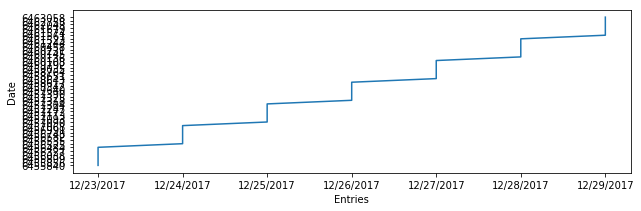

In [631]:
#Attempt 1 without Pandas
single_turnstile = mta_date_count[('A002',
              'R051',
              '02-00-00',
              '59 ST')]
dates = []
counts = []
for i in single_turnstile:
    dates.append(i[0])
    counts.append(i[1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts)
plt.xlabel('Entries')
plt.ylabel('Date');

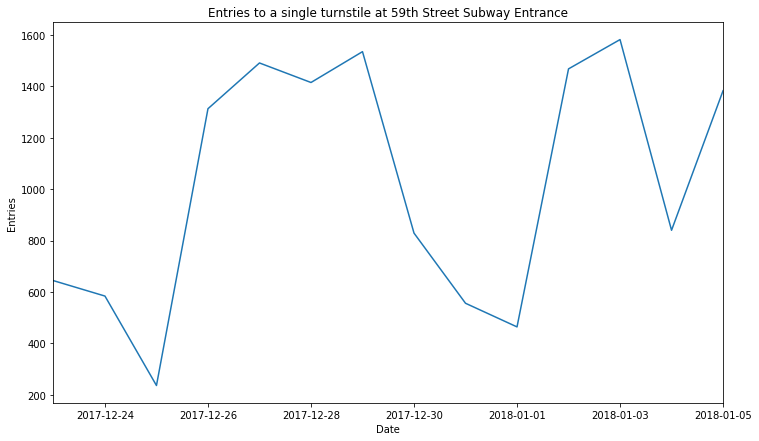

In [742]:
#Attempt 2 with Pandas
df_single_turnstile = mta[(mta.UNIT == 'R051') & (mta['C/A'] == 'A002') & (mta.SCP == '02-00-00')\
   &(mta.STATION == '59 ST')].groupby(mta.DATE_TIME.dt.date)['NEW_ENTRIES'].sum()
df_single_turnstile.plot(kind = 'line', figsize = (12,7))
plt.ylabel('Entries')
plt.xlabel('Date')
plt.title('Entries to a single turnstile at 59th Street Subway Entrance');


### Challenge 5 

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [735]:
df_grouped_turnstile = mta.groupby([ 'C/A', 'UNIT', 'STATION', mta.DATE_TIME.dt.date])['NEW_ENTRIES']\
    .sum()
df_grouped_turnstile.head(10)

C/A   UNIT  STATION  DATE_TIME 
A002  R051  59 ST    2017-12-23     6137.0
                     2017-12-24     5369.0
                     2017-12-25     3128.0
                     2017-12-26    11262.0
                     2017-12-27    13904.0
                     2017-12-28    13617.0
                     2017-12-29    13386.0
                     2017-12-30     7944.0
                     2017-12-31     5939.0
                     2018-01-01     4961.0
Name: NEW_ENTRIES, dtype: float64

### Challenge 6

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] type of time series for each STATION, by adding up all the turnstiles in a station.

In [736]:
df_station_group = mta.groupby(['STATION', mta.DATE_TIME.dt.date])['NEW_ENTRIES'].sum()
df_station_group.tail(20)

STATION          DATE_TIME 
SHEEPSHEAD BAY   2017-12-24     5223.0
                 2017-12-25     4128.0
                 2017-12-26    11253.0
                 2017-12-27    12095.0
                 2017-12-28    11227.0
                 2017-12-29    10738.0
TIMES SQ-42 ST   2017-12-23     4221.0
                 2017-12-24     3946.0
                 2017-12-25     2888.0
                 2017-12-26     9316.0
                 2017-12-27    11879.0
                 2017-12-28    11907.0
                 2017-12-29    10588.0
WHITEHALL S-FRY  2017-12-23     5130.0
                 2017-12-24     6718.0
                 2017-12-25     5773.0
                 2017-12-26    15458.0
                 2017-12-27    18024.0
                 2017-12-28    18249.0
                 2017-12-29    16784.0
Name: NEW_ENTRIES, dtype: float64

### Challenge 7

Plot the time series for a station.

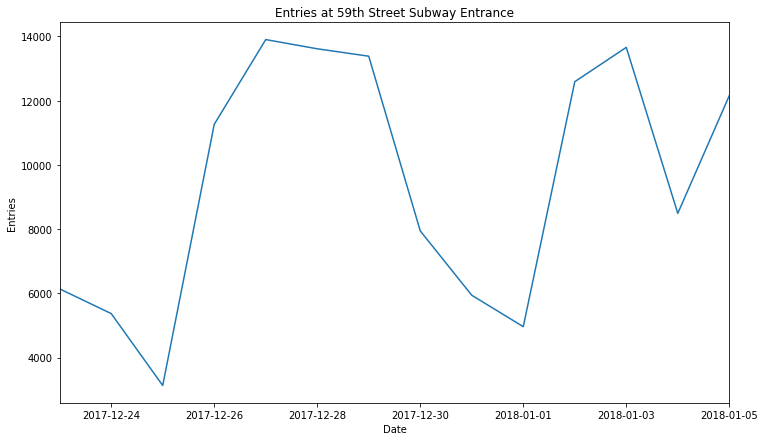

In [743]:
mta[mta.STATION == '59 ST'].groupby(mta.DATE_TIME.dt.date)['NEW_ENTRIES']\
    .sum().plot(kind = 'line', figsize = (12,7));
plt.ylabel('Entries')
plt.xlabel('Date')
plt.title('Entries at 59th Street Subway Entrance');

### Challenge 8

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.